In [ ]:
#Import
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

# Project Work Analisi delle richieste di Finanziamento

Il file DataSetTestTraining44000.xlsx contiene i dati relativi al rischio finanziario per l'approvazione dei
finanziamenti di un istituto bancario (44.000 righe)
Colonne del dataset:
1. Eta
2. Sesso
3. TitoloStudio
4. RedditoLordoUltimoAnno
5. AnniEsperienzaLavorativa
6. InformazioniImmobile
7. ImportoRichiesto
8. ScopoFinanziamento
9. TassoInteresseFinanziamento
10. ImportoRichiestoDivisoReddito
11. DurataDellaStoriaCreditiziaInAnni
12. AffidabilitàCreditizia
13. InadempienzeFinanziamentiPrecedenti
14. FinanziamentoApprovato (target)

l'Affidabilità creditizia è una rappresentazione numerica dell'affidabilità creditizia di un individuo, che in
genere varia da 300 a 850. Riflette la probabilità che una persona rimborsi puntualmente un finanziamento.
Punteggi più alti indicano generalmente una maggiore probabilità di rimborso e possono portare a
condizioni di finanziamento migliori.

## Parte 1
1. Caricamento Dati
2. Controllo e gestione dati mancanti
3. Analisi esplorativa (indici statistici vari) e ricerca delle correlazioni fra le variabili
4. Gestione outlier, inconsistenze (normalmente i dati sono già tutti ok perché provengono da database)
5. Divisione in set di training e set di valutazione
6. Normalizzazione variabili
7. Scelta algoritmo e ricerca dei migliori parametri e salvataggio del modello su file
8. Valutazione modello

### 1. Caricamento Dati

In [2]:
df = pd.read_excel(f'dati/DataSetTestTraining44000.xlsx')
df.to_csv('dati/DataSetTestTraining44000.csv')

In [3]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44000 entries, 0 to 43999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Eta                                  44000 non-null  int64  
 1   Sesso                                44000 non-null  object 
 2   TitoloStudio                         44000 non-null  object 
 3   RedditoLordoUltimoAnno               44000 non-null  int64  
 4   AnniEsperienzaLavorativa             44000 non-null  int64  
 5   InformazioniImmobile                 44000 non-null  object 
 6   ImportoRichiesto                     44000 non-null  int64  
 7   ScopoFinanziamento                   44000 non-null  object 
 8   TassoInteresseFinanziamento          44000 non-null  float64
 9   ImportoRichiestoDivisoReddito        44000 non-null  float64
 10  DurataDellaStoriaCreditiziaInAnni    44000 non-null  int64  
 11  AffidabilitàCreditizia      

,Eta,Sesso,TitoloStudio,RedditoLordoUltimoAnno,AnniEsperienzaLavorativa,InformazioniImmobile,ImportoRichiesto,ScopoFinanziamento,TassoInteresseFinanziamento,ImportoRichiestoDivisoReddito,DurataDellaStoriaCreditiziaInAnni,AffidabilitàCreditizia,InadempienzeFinanziamentiPrecedenti,FinanziamentoApprovato
0,22,F,Laurea,71948,0,Affitto,35000,Personale,16.02,0.49,3,561,NO,SI
1,21,F,Diploma,12282,0,ProprietàMutuoEstinto,1000,Formazione,11.14,0.08,2,504,SI,NO
2,25,F,Diploma,12438,3,ProprietàMutuoDaEstinguere,5500,Medico,12.87,0.44,3,635,NO,SI
3,23,F,Laurea,79753,0,Affitto,35000,Medico,15.23,0.44,2,675,NO,SI
4,24,M,Laurea,66135,1,Affitto,35000,Medico,14.27,0.53,4,586,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43995,25,M,Diploma,44442,2,Affitto,2577,RistrutturazioneCasa,1.59,0.06,4,659,NO,SI
43996,30,M,Diploma,51558,9,Affitto,14750,Personale,11.01,0.29,8,702,NO,SI
43997,30,M,Laurea,37218,6,Affitto,14125,Medico,14.45,0.38,10,657,NO,SI
43998,29,F,Laurea,42803,6,Affitto,5000,Medico,14.76,0.12,9,650,NO,SI


### 2. Controllo e gestione dati mancanti

In [4]:
## Eventuale gestione di NaN

## Rimuove le righe con NaN nelle colonne specificate
# df_cleaned = df.dropna(subset=['inserisci qui la colonna1', 'inserisci qui la colonna2'])

## Sostituisce i NaN con 0 nelle colonne specificate
# df_filled_zero = df.fillna({'inserisci qui la colonna1': 0, 'inserisci qui la colonna2': 0})

## Sostituisce i NaN con la media nelle colonne specificate
# df_filled_mean = df.fillna({'inserisci qui la colonna1': df['inserisci qui la colonna1'].mean(),
#                             'inserisci qui la colonna2': df['inserisci qui la colonna2'].mean()})

### 3. Analisi esplorativa (indici statistici vari) e ricerca delle correlazioni fra le variabili

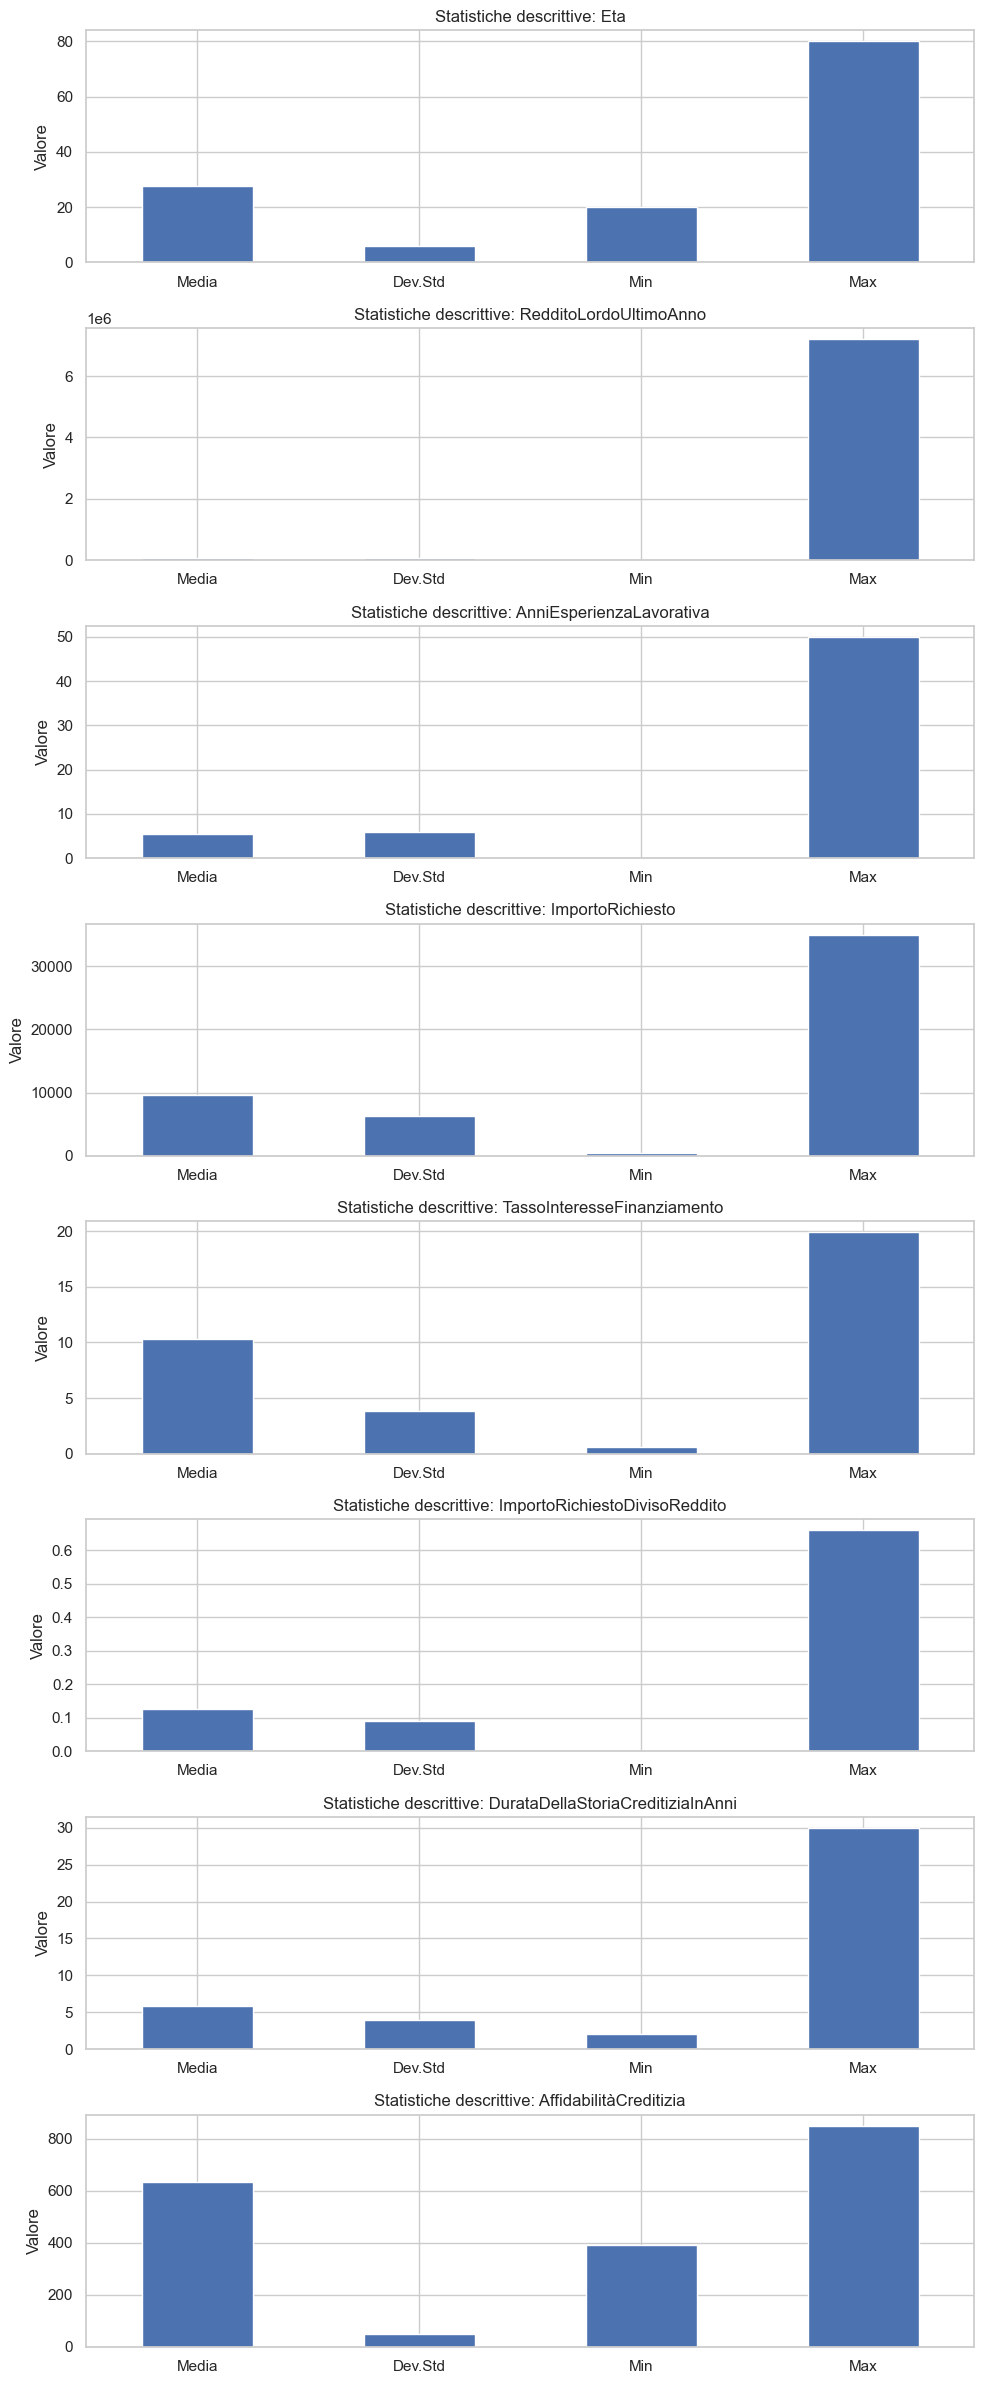

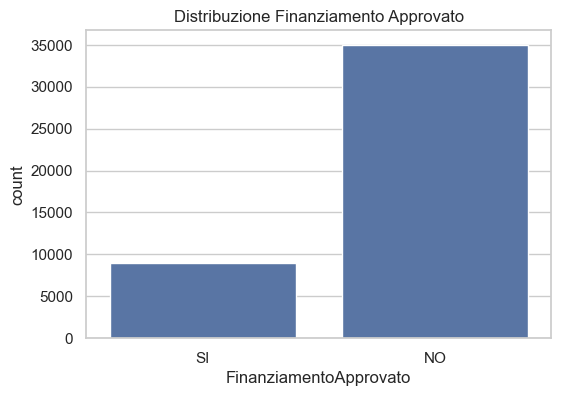

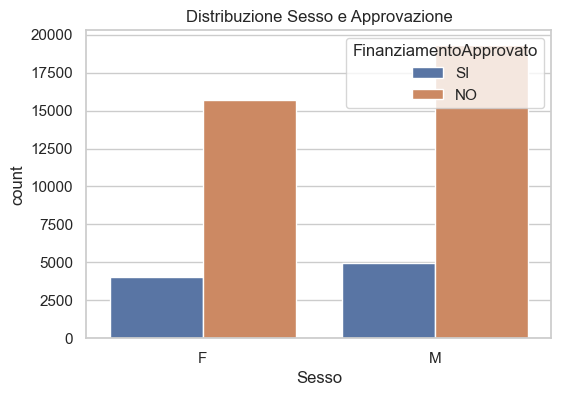

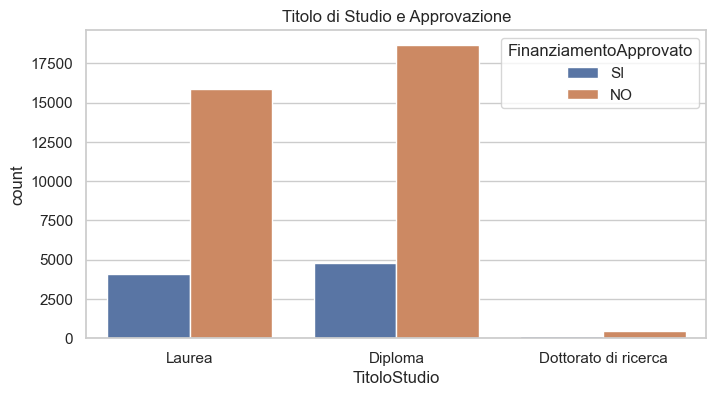

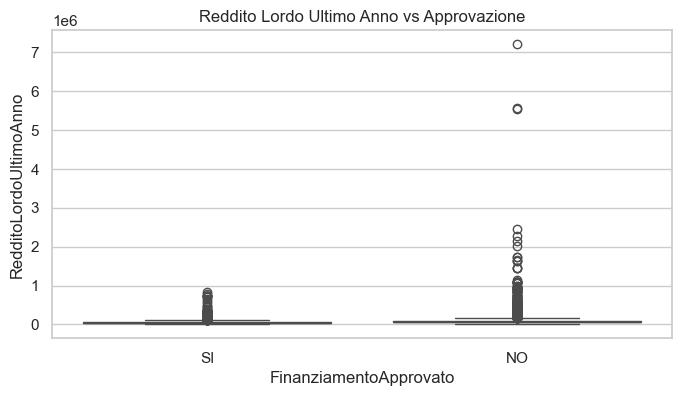

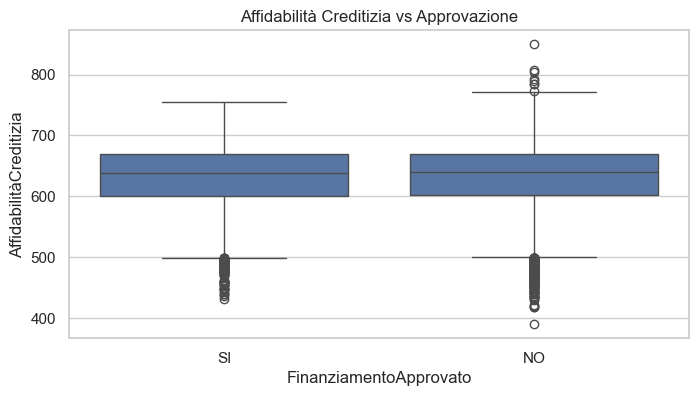

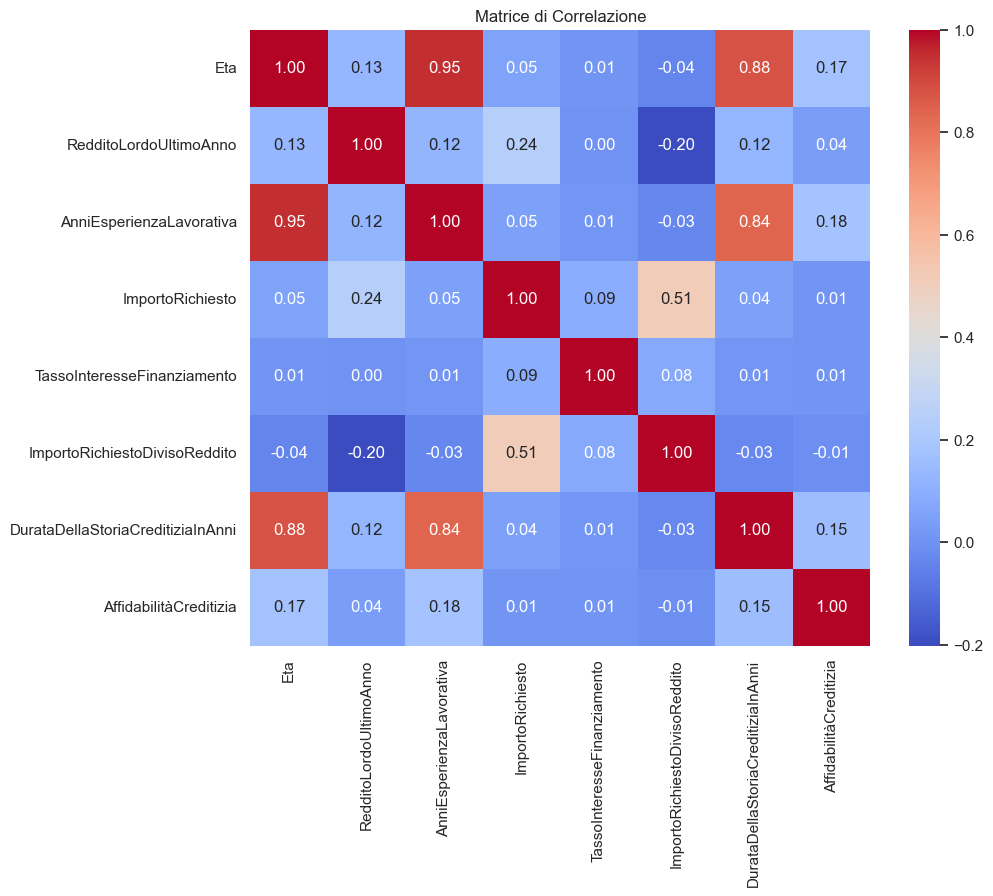

In [5]:
# Imposta lo stile dei grafici
sns.set(style="whitegrid")

num_cols = [
    'Eta', 'RedditoLordoUltimoAnno', 'AnniEsperienzaLavorativa',
    'ImportoRichiesto', 'TassoInteresseFinanziamento',
    'ImportoRichiestoDivisoReddito', 'DurataDellaStoriaCreditiziaInAnni',
    'AffidabilitàCreditizia'
]

desc = df[num_cols].describe().T

# 1. Statistiche descrittive delle variabili numeriche in subplot separati
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 3 * len(num_cols)))
for i, col in enumerate(num_cols):
    desc.loc[col][['mean', 'std', 'min', 'max']].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Statistiche descrittive: {col}')
    axes[i].set_ylabel('Valore')
    axes[i].set_xticklabels(['Media', 'Dev.Std', 'Min', 'Max'], rotation=0)
plt.tight_layout()
plt.show()

# 2. Distribuzione target
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='FinanziamentoApprovato')
plt.title('Distribuzione Finanziamento Approvato')
plt.show()

# 3. Distribuzione per Sesso
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sesso', hue='FinanziamentoApprovato')
plt.title('Distribuzione Sesso e Approvazione')
plt.show()

# 4. Distribuzione per TitoloStudio
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='TitoloStudio', hue='FinanziamentoApprovato')
plt.title('Titolo di Studio e Approvazione')
plt.show()

# 5. Boxplot RedditoLordoUltimoAnno vs Approvazione
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='FinanziamentoApprovato', y='RedditoLordoUltimoAnno')
plt.title('Reddito Lordo Ultimo Anno vs Approvazione')
plt.show()

# 6. Boxplot AffidabilitàCreditizia vs Approvazione
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='FinanziamentoApprovato', y='AffidabilitàCreditizia')
plt.title('Affidabilità Creditizia vs Approvazione')
plt.show()

# 7. Heatmap correlazione variabili numeriche
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()

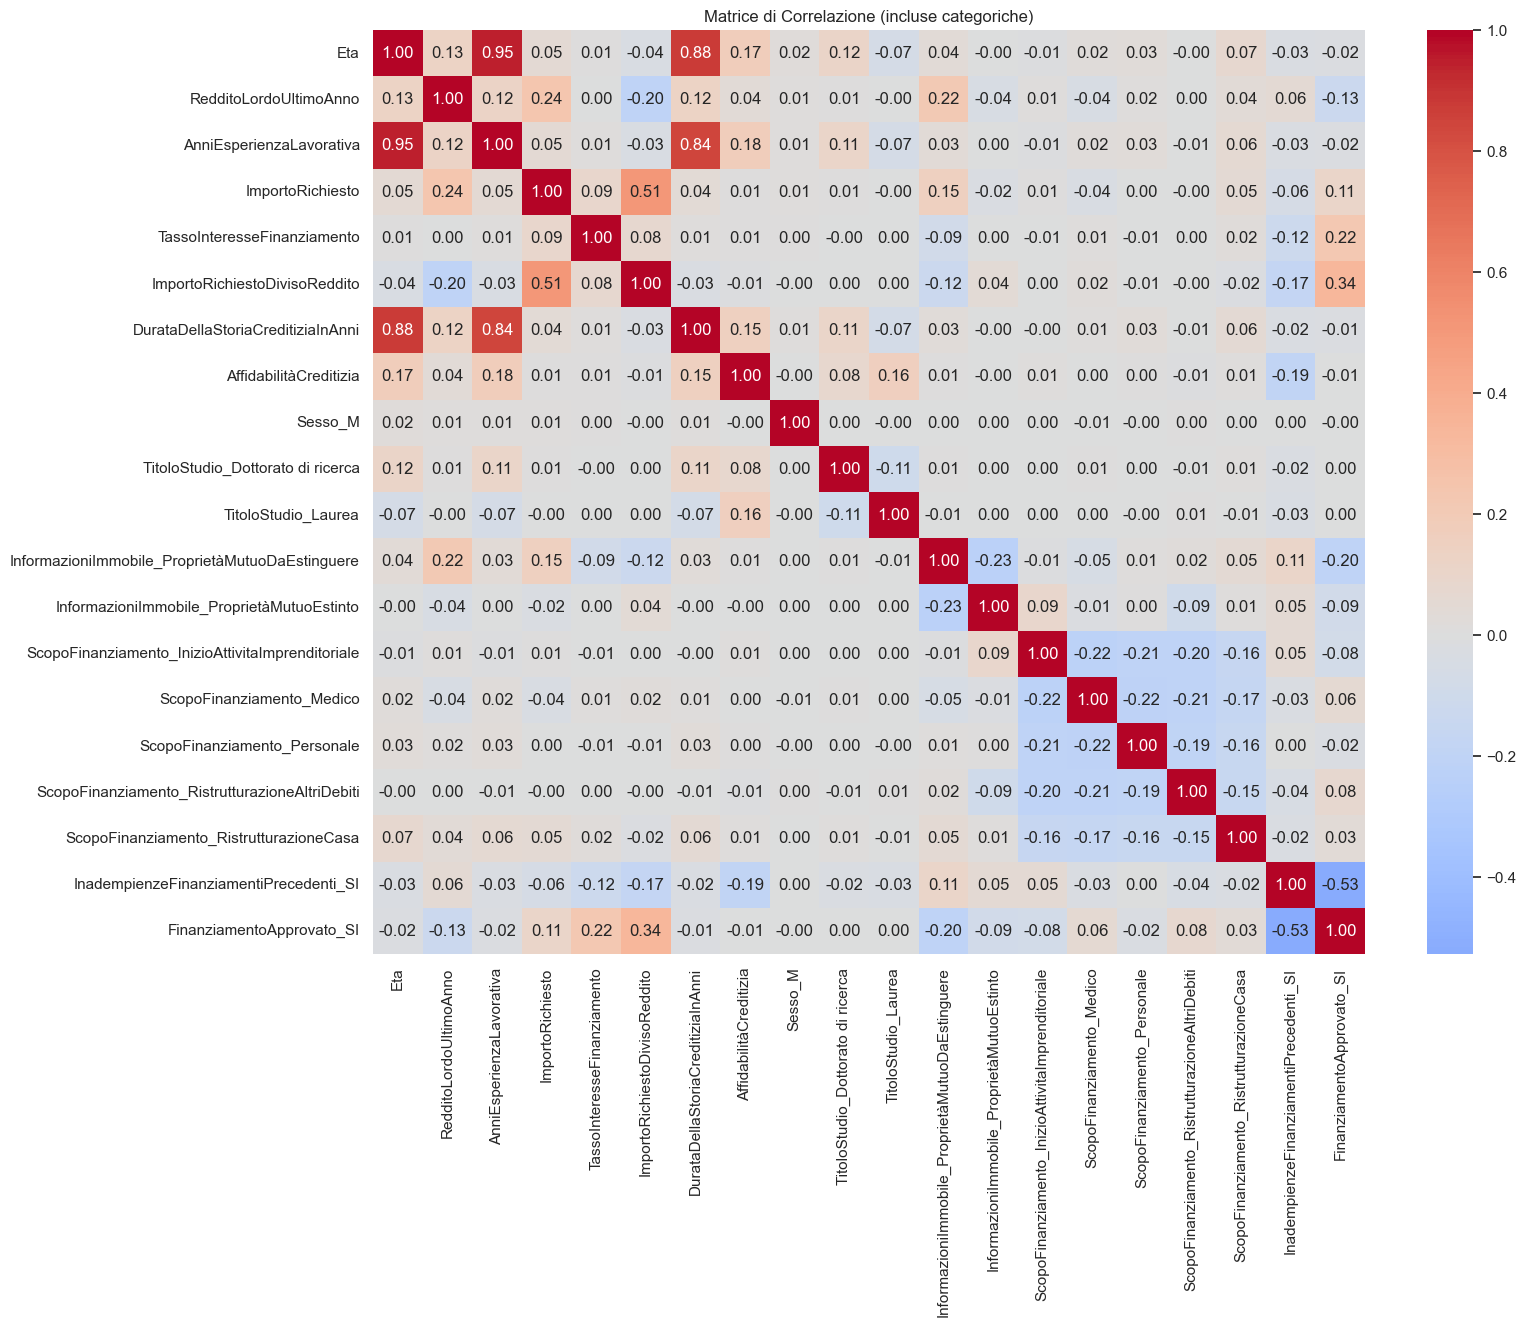

In [6]:
## Matrice di correlazione con anche le variabili categoriche
# Calcola la matrice di correlazione usando get_dummies per le categoriche
corr_all = pd.get_dummies(df, drop_first=True).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_all, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('Matrice di Correlazione (incluse categoriche)')
plt.show()

### 4. Gestione outlier, inconsistenze (normalmente i dati sono già tutti ok perché provengono da database)

In [7]:
## Eventuale gestione degli outliers

## Rimuove gli outlier usando l'IQR per una o più colonne numeriche
# Q1 = df['inserisci qui la colonna1'].quantile(0.25)
# Q3 = df['inserisci qui la colonna1'].quantile(0.75)
# IQR = Q3 - Q1
# df_no_outliers = df[~((df['inserisci qui la colonna1'] < (Q1 - 1.5 * IQR)) | (df['inserisci qui la colonna1'] > (Q3 + 1.5 * IQR)))]

## Sostituisce gli outlier con il valore massimo/minimo accettabile (clipping)
# lower = Q1 - 1.5 * IQR
# upper = Q3 + 1.5 * IQR
# df_clipped = df.copy()
# df_clipped['inserisci qui la colonna2'] = df_clipped['inserisci qui la colonna2'].clip(lower, upper)

## Sostituisce gli outlier con la mediana della colonna
# median = df['inserisci qui la colonna3'].median()
# df_replace_outliers = df.copy()
# df_replace_outliers.loc[(df['inserisci qui la colonna3'] < lower) | (df['inserisci qui la colonna3'] > upper), 'inserisci qui la colonna3'] = median

### 5. Divisione in set di training e set di valutazione

In [8]:
# Separazione delle feature (X) e del target (y)
X = df.drop('FinanziamentoApprovato', axis=1)
y = df['FinanziamentoApprovato']

# Converti il target in numerico
y = y.map({'NO': 0, 'SI': 1})

# Per le variabili categoriche, codifica automatica (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Divisione in training e validation set (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")

Training set: (35200, 19), Validation set: (8800, 19)


### 6. Normalizzazione variabili

In [9]:
# Quando userai Flask, dovrai salvare lo scaler usato (ad esempio con joblib) e ricaricarlo per trasformare i dati nuovi prima della predizione

# Inizializza gli scaler
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Applica ogni scaler solo sui dati di training, poi trasforma anche la validation
for name, scaler in scalers.items():
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    print(f"{name} - Train:\n{X_train_scaled}\nValidation:\n{X_val_scaled}\n")

StandardScaler - Train:
[[-0.63277146 -0.63892361 -0.91080112 ... -0.43297131 -0.34535847
  -1.0384075 ]
 [-0.97005282 -0.37452261 -0.40471264 ... -0.43297131 -0.34535847
  -1.0384075 ]
 [-0.97005282 -0.23092034 -0.91080112 ... -0.43297131 -0.34535847
  -1.0384075 ]
 ...
 [ 0.04179127  0.19119828 -0.06732031 ... -0.43297131 -0.34535847
   0.96301308]
 [ 0.54771332 -0.60521863  0.60746433 ... -0.43297131 -0.34535847
   0.96301308]
 [ 0.88499468  3.97321913  0.60746433 ... -0.43297131 -0.34535847
   0.96301308]]
Validation:
[[ 0.21043195 -0.23542925  0.27007201 ... -0.43297131 -0.34535847
   0.96301308]
 [ 0.21043195 -0.23715982 -0.23601647 ... -0.43297131 -0.34535847
   0.96301308]
 [ 0.716354    1.17993251  1.28224898 ... -0.43297131 -0.34535847
   0.96301308]
 ...
 [-0.63277146  0.33119813 -0.74210496 ...  2.30962185 -0.34535847
   0.96301308]
 [-0.97005282 -0.05694475 -0.91080112 ... -0.43297131 -0.34535847
   0.96301308]
 [ 1.05363536 -0.61887486  1.11355282 ... -0.43297131 -0.34535

### 7. Scelta algoritmo e ricerca dei migliori parametri e salvataggio del modello su file

In [10]:
# Proviamo ogni algortmo con ogni scaler

best_score = 0
best_scaler = None
best_model = None
best_model_name = ""
best_scaler_name = ""

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBClassifier": xgb.XGBClassifier(eval_metric='logloss')
}

for scaler_name, scaler in scalers.items():
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_val_scaled)
        score = accuracy_score(y_val, preds)
        print(f"{scaler_name} + {model_name}: {score}")
        
        if score > best_score:
            best_score = score
            best_scaler = scaler
            best_model = model
            best_model_name = model_name
            best_scaler_name = scaler_name

print(f"Best: {best_scaler_name} + {best_model_name} -> {best_score}")

# Salva il miglior modello e scaler
import joblib
joblib.dump(best_model, "model_scaler/best_model.pkl")
joblib.dump(best_scaler, "model_scaler/best_scaler.pkl")

StandardScaler + LogisticRegression: 0.8818181818181818
StandardScaler + RandomForestClassifier: 0.9259090909090909
StandardScaler + GradientBoostingClassifier: 0.9238636363636363
StandardScaler + XGBClassifier: 0.9379545454545455
MinMaxScaler + LogisticRegression: 0.87875
MinMaxScaler + RandomForestClassifier: 0.9251136363636364
MinMaxScaler + GradientBoostingClassifier: 0.9238636363636363
MinMaxScaler + XGBClassifier: 0.9379545454545455
RobustScaler + LogisticRegression: 0.8819318181818182
RobustScaler + RandomForestClassifier: 0.9259090909090909
RobustScaler + GradientBoostingClassifier: 0.9238636363636363
RobustScaler + XGBClassifier: 0.9379545454545455
Best: StandardScaler + XGBClassifier -> 0.9379545454545455


['model_scaler/best_scaler.pkl']

### 8. Valutazione modello

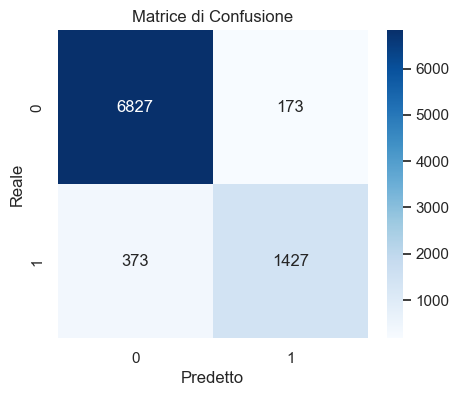

               precision    recall  f1-score   support

Non approvato       0.95      0.98      0.96      7000
    Approvato       0.89      0.79      0.84      1800

     accuracy                           0.94      8800
    macro avg       0.92      0.88      0.90      8800
 weighted avg       0.94      0.94      0.94      8800



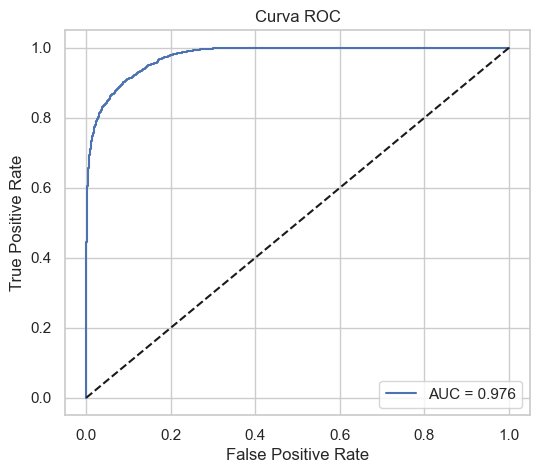

----- Analisi degli errori -----

Numero di errori: 546 su 8800 campioni (6.20%)



,Eta,RedditoLordoUltimoAnno,AnniEsperienzaLavorativa,ImportoRichiesto,TassoInteresseFinanziamento,ImportoRichiestoDivisoReddito,DurataDellaStoriaCreditiziaInAnni,AffidabilitàCreditizia,Sesso_M,TitoloStudio_Dottorato di ricerca,...,InformazioniImmobile_ProprietàMutuoDaEstinguere,InformazioniImmobile_ProprietàMutuoEstinto,ScopoFinanziamento_InizioAttivitaImprenditoriale,ScopoFinanziamento_Medico,ScopoFinanziamento_Personale,ScopoFinanziamento_RistrutturazioneAltriDebiti,ScopoFinanziamento_RistrutturazioneCasa,InadempienzeFinanziamentiPrecedenti_SI,y_true,y_pred
8235,24,61403,5,6000,15.62,0.01,2,674,False,False,...,True,False,False,False,False,False,False,False,1,0
42272,29,262666,7,25000,18.88,0.01,9,618,False,False,...,True,False,False,False,False,False,True,False,1,0
14397,24,58558,0,14550,9.62,0.25,3,701,False,False,...,False,False,False,False,False,True,False,False,0,1
42740,27,24996,1,3364,12.61,0.13,5,686,False,False,...,False,False,True,False,False,False,False,False,1,0
28175,33,124756,9,9000,14.65,0.07,9,654,True,False,...,False,False,False,False,False,False,False,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,22,45612,0,10000,11.01,0.22,3,657,True,False,...,False,False,False,True,False,False,False,False,1,0
20666,29,44314,7,8000,6.54,0.18,8,586,False,False,...,True,False,False,False,True,False,False,False,1,0
27634,28,172618,9,8275,16.49,0.05,7,619,False,False,...,True,False,False,False,False,False,True,False,1,0
5830,22,40920,1,5500,11.01,0.13,3,619,True,False,...,False,False,False,False,False,True,False,False,1,0


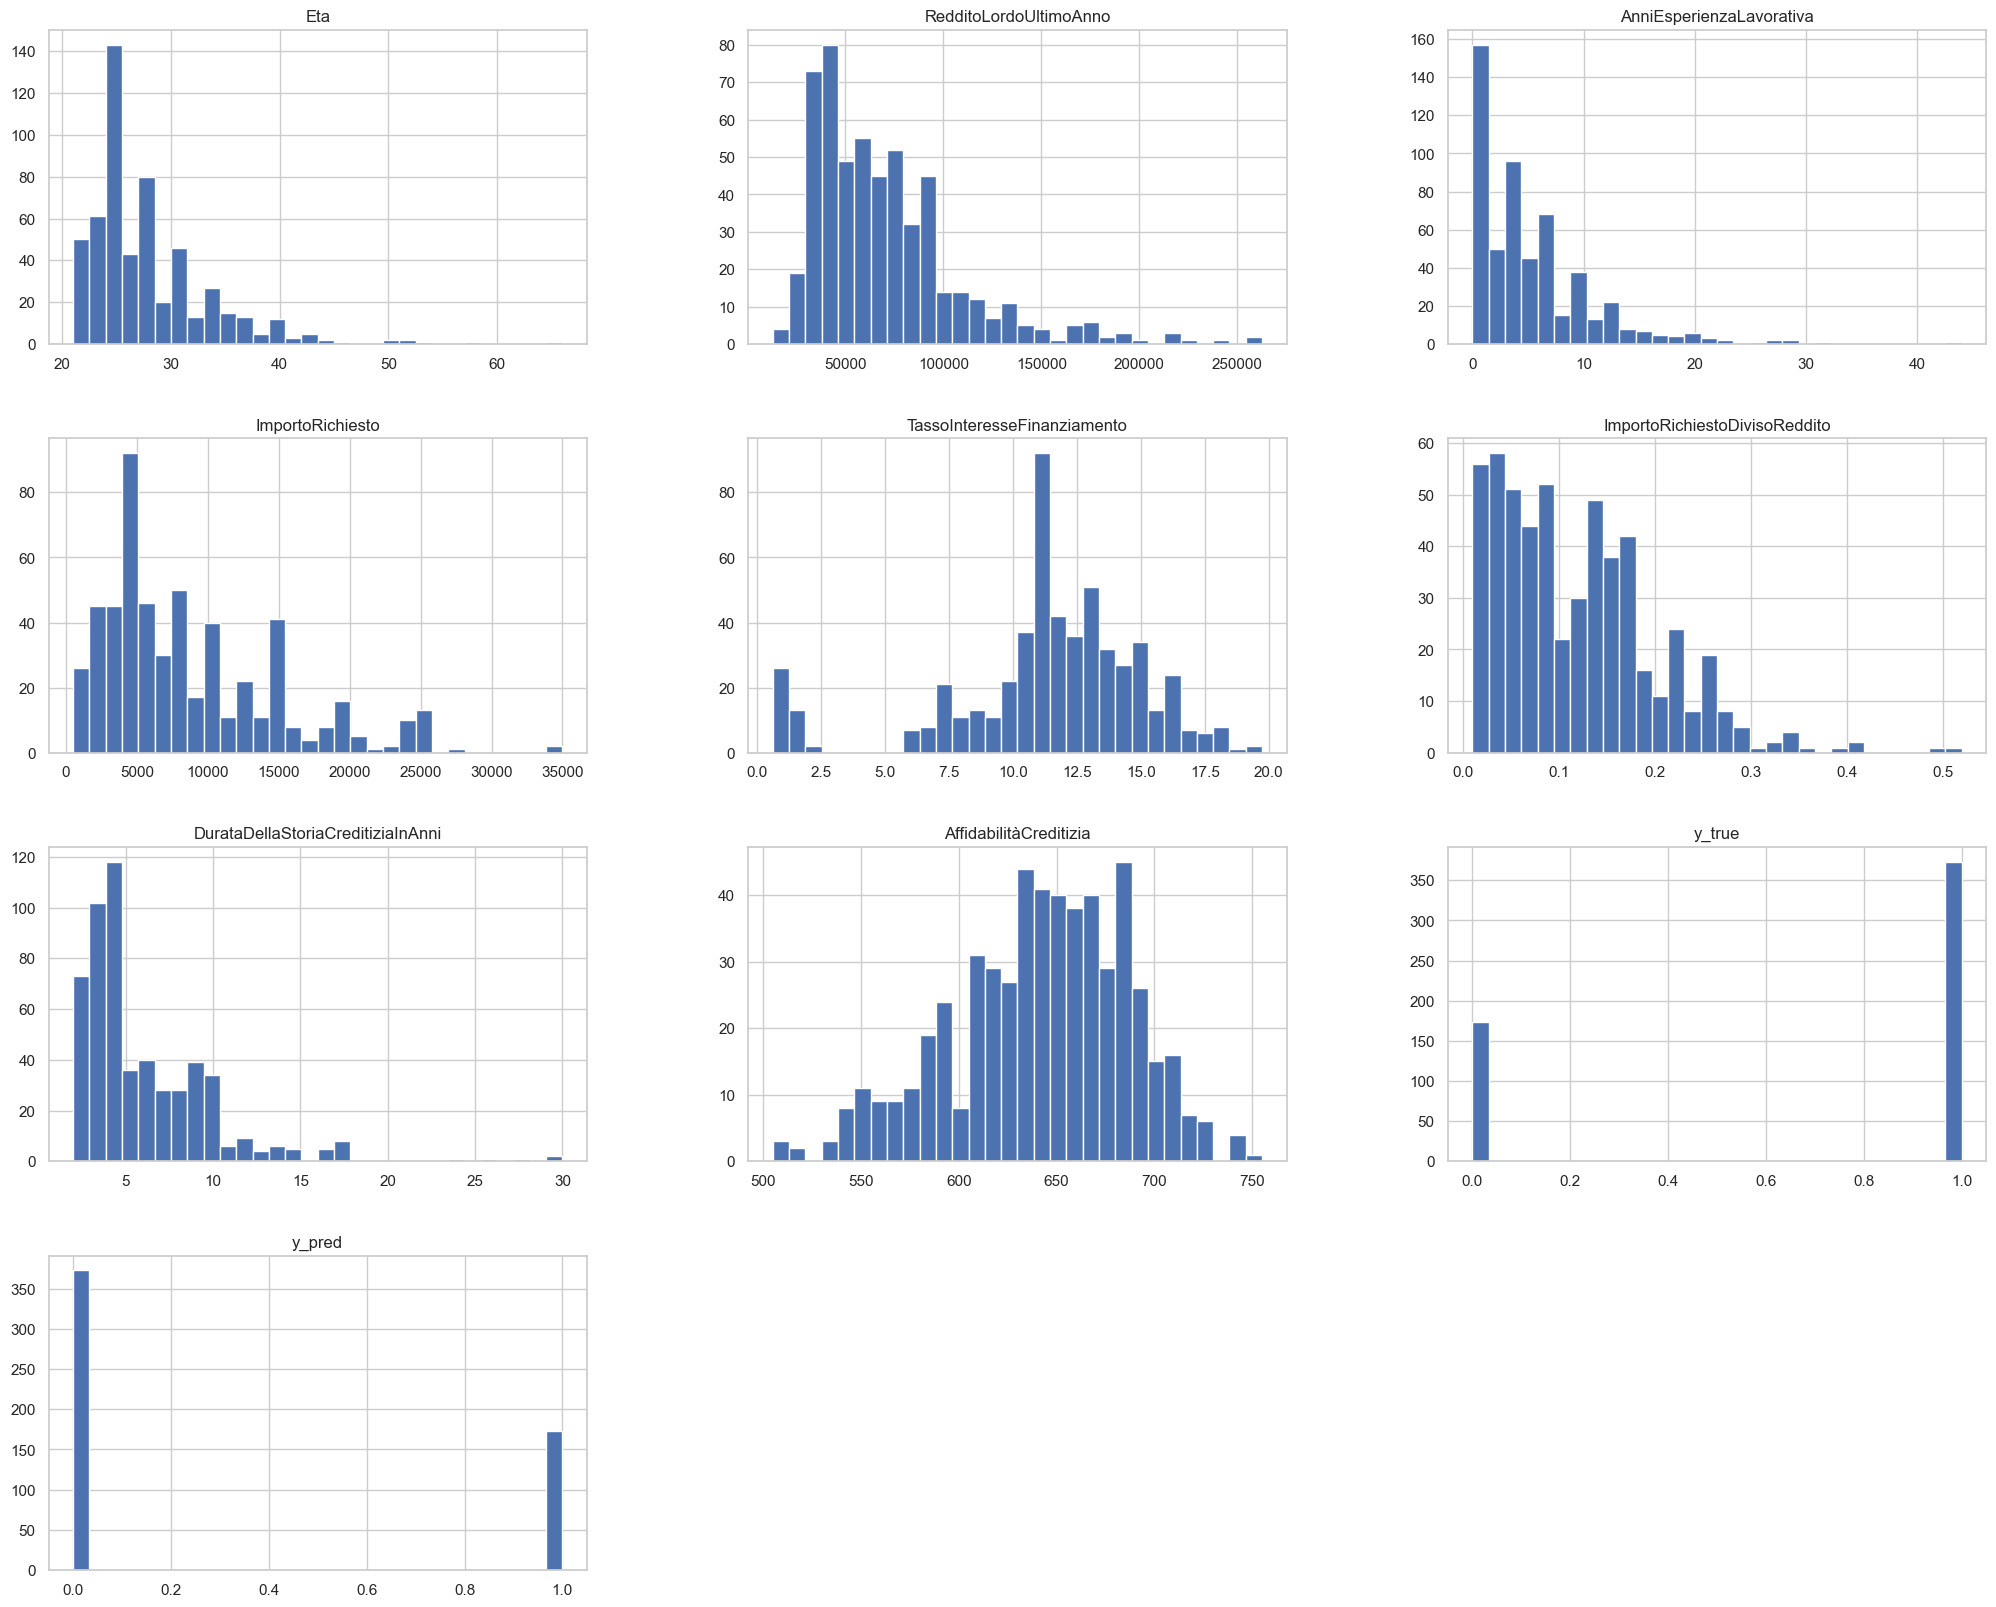

In [11]:
# Previsioni probabilità e classi
y_pred = best_model.predict(X_val_scaled)
y_proba = best_model.predict_proba(X_val_scaled)[:, 1]

# Matrice di confusione
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.title('Matrice di Confusione')
plt.show()

# Precision, Recall, F1-score
print(classification_report(y_val, y_pred, target_names=['Non approvato', 'Approvato']))

# ROC curve e AUC
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Analisi degli errori
errors = X_val.copy()
errors['y_true'] = y_val
errors['y_pred'] = y_pred
errors_false = errors[errors['y_true'] != errors['y_pred']] # y_true conterrà i valori nel dataset reale che sono stati predetti in modo errato, y_pred l'opposto
print(f"----- Analisi degli errori -----\n")
print(f"Numero di errori: {len(errors_false)} su {len(y_val)} campioni ({len(errors_false)/len(y_val)*100:.2f}%)\n")
# capire quali sono le statistiche che hanno portato agli errori
errors_false.hist(figsize=(25, 20), bins=30)
errors_false

## Parte 2
1. Implementare una WebAPI con Flask che accetta una richiesta POST con i dati di una richiesta di
finanziamento in formato JSON e restituisce in formato JSON la probabilità che il finanziamento venga
approvato
2. Creare una Pagina web (HTML + Javascript) per inserire i dati della richiesta di finanziamento. Inserire
un button per inviare i dati all’endpoint Flask. Visualizzare la previsione (probabilità di finanziamento
approvato) nella pagina.

### 1. Implementare una WebAPI con Flask
**.1** accetta una richiesta POST con i dati di una richiesta di finanziamento in formato JSON  
**.2** restituisce in formato JSON la probabilità che il finanziamento venga approvato

In [ ]:
# guardare app.py

# Esempio di input JSON per la predizione
input_json = {
  "Eta": 35,
  "Sesso": "M",
  "TitoloStudio": "Laurea",
  "RedditoLordoUltimoAnno": 25000,
  "AnniEsperienzaLavorativa": 10,
  "InformazioniImmobile": "ProprietàMutuoEstinto",
  "ImportoRichiesto": 15000,
  "ScopoFinanziamento": "Medico",
  "TassoInteresseFinanziamento": 3.5,
  "ImportoRichiestoDivisoReddito": 0.6,
  "DurataDellaStoriaCreditiziaInAnni": 5,
  "AffidabilitàCreditizia": 700,
  "InadempienzeFinanziamentiPrecedenti": "NO"
}

### 2. Creare una Pagina web (HTML + Javascript) per inserire i dati della richiesta di finanziamento
**.1** Inserire un button per inviare i dati all’endpoint Flask  
**.2** Visualizzare la previsione (probabilità di finanziamento approvato) nella pagina  

In [ ]:
# guardare index.html per il frontend
# per vedere index.html si può andare su http://127.0.0.1:5000/

## Parte 3
Creare un database in locale o su server remoto con tecnologia a scelta (mongodb, elasticsearch, sql server)
Nel database deve essere possibile memorizzare dei documenti (o record) con le seguenti colonne:
1. RichiestaFinanziamentoID
2. Eta
3. Sesso
4. TitoloStudio
5. RedditoLordoUltimoAnno
6. AnniEsperienzaLavorativa
7. InformazioniImmobile
8. ImportoRichiesto
9. ScopoFinanziamento
10. TassoInteresseFinanziamento
11. ImportoRichiestoDivisoReddito
12. DurataDellaStoriaCreditiziaInAnni
13. AffidabilitàCreditizia
14. InadempienzeFinanziamentiPrecedenti
15. ProbabilitaFinanziamentoApprovato

Attenzione che da questo punto in poi è possibile implementare le funzionalità richieste in vario modo
incrociando script lato client e script lato server in vari modi.
Creare una pagina web con un button “importa” che premendolo permette di ottenere questo risultato:
1. I dati di 100 nuove richieste di finanziamento ottenuti da questa chiamata
https://testbobphp2.altervista.org/000AiForemaProjectWork/richieste_finanziamenti.php
vengono caricati sulla tabella del database creato: notare che la webapi non restituisce la
colonna “ProbabilitaFinanziamentoApprovato”
2. Per ogni richiesta di finanziamento importato nel database -> calcolare la
ProbabilitaFinanziamentoApprovato utilizzando il modello implementato nella Parte 1.
3. Attenzione che in caso di rilancio della procedura bisogna evitare di reimportare Richieste di
Finanziamento già importate (identificabili univocamente tramite RichiestaFinanziamentoID).
Inoltre nei 3 giorni del project work la chiamata potrebbe restituire le 100 richieste +altre
nuove.

In [ ]:
# per utilizzarlo andare alla pagina http://127.0.0.1:5000/importa_html e importare.
# poi il file finanziamenti.db si può visualizzare su DB Browser for SQL Lite

## Parte 4
Creare una pagina web che fa visualizzare la lista delle richieste di finanziamento importate con la probabilità che venga approvato (colonna ProbabilitaFinanziamentoApprovato)  

Nella pagina deve essere possibile fare le ricerche fra le varie richieste di finanziamento:
1. Eta (compresa fra min e max)
2. Sesso (select)
3. TitoloStudio (select)
4. RedditoLordoUltimoAnno (compreso fra min e max)
5. AnniEsperienzaLavorativa (compresa fra min e max)
6. InformazioniImmobile (select)
7. ImportoRichiesto (compreso fra min e max)
8. ScopoFinanziamento (select)
9. TassoInteresseFinanziamento (compreso fra min e max)
10. ImportoRichiestoDivisoReddito (compreso fra min e max)
11. DurataDellaStoriaCreditiziaInAnni (compreso fra min e max)
12. AffidabilitàCreditizia (compreso fra min e max)
13. InadempienzeFinanziamentiPrecedenti (select)
14. ProbabilitaFinanziamentoApprovato (compreso fra min e max)

Deve essere possibile esportare in formato csv/Excel/json il risultato della ricerca

In [ ]:
# per utilizzarlo andare alla pagina http://127.0.0.1:5000/richieste.
# teoricamente si dovrebbero vedere subito se ci sono richieste già inserite nel database.
# se si selezionano i filtri e si preme cercasi vedono le richieste filtrate.
# per esportare il risultato della ricerca in csv, excel o json basta premere i rispettivi bottoni.

## Parte 5
Creare una pagina html che permette di effettuare delle statistiche grafiche sui dati presenti sul database
(indipendentemente dalla ProbabilitaFinanziamentoApprovato)
Creare 4 grafici:
1. Grafico a torta con il conteggio delle richieste di finanziamento per Sesso
2. Grafico a barre verticali che visualizza la somma degli ImportiRichiesti per InformazioniImmobile
3. Grafico a barre orizzontali che visualizza la somma degli ImportiRichiesti dei finanziamenti per
TitoloStudio
4. Grafico a scelta che visualizza con il conteggio dei finanziamenti per ScopoFinanziamento

In [ ]:
# per utilizzarlo andare alla pagina http://127.0.0.1:5000/statistiche
# tutti i grafici presenti sono dinamici e interattivi.
# hanno anche la funione di filtro.